# COVID-19 ကပ်ရောဂါအခြေအနေခန့်မှန်းခြင်း

## ဒေတာတင်သွင်းခြင်း

ကျွန်ုပ်တို့သည် COVID-19 ကူးစက်ခံရသူများအကြောင်း ဒေတာကို အသုံးပြုမည်ဖြစ်ပြီး၊ ၎င်းကို [Johns Hopkins University](https://jhu.edu/) ရှိ [Center for Systems Science and Engineering](https://systems.jhu.edu/) (CSSE) မှ ပံ့ပိုးပေးထားပါသည်။ ဒေတာစုစည်းမှုကို [ဒီ GitHub Repository](https://github.com/CSSEGISandData/COVID-19) တွင် ရရှိနိုင်ပါသည်။


In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3) # make figures larger

ကျွန်ုပ်တို့သည် `pd.read_csv` ကို အသုံးပြု၍ အလွန်မကြာသေးမီက ဒေတာကို GitHub မှ တိုက်ရိုက် လုပ်ဆောင်နိုင်ပါသည်။ တစ်စုံတစ်ရာအကြောင်းကြောင့် ဒေတာမရရှိနိုင်ပါက၊ `data` ဖိုလ်ဒါအတွင်းရှိ ဒေတာမိတ္တူကို အမြဲအသုံးပြုနိုင်ပါသည် - `base_url` ကို သတ်မှတ်ထားသော အောက်ပါလိုင်းကို မှတ်ချက်မထားရုံဖြင့် ပြုလုပ်နိုင်ပါသည်။


In [125]:
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/" # loading from Internet
# base_url = "../../data/COVID/" # loading from disk
infected_dataset_url = base_url + "time_series_covid19_confirmed_global.csv"
recovered_dataset_url = base_url + "time_series_covid19_recovered_global.csv"
deaths_dataset_url = base_url + "time_series_covid19_deaths_global.csv"
countries_dataset_url = base_url + "../UID_ISO_FIPS_LookUp_Table.csv"

In [126]:
infected = pd.read_csv(infected_dataset_url)
infected.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  8/20/21  8/21/21  8/22/21  \
0        0        0        0        0  ...   152448   152448   152448   
1        0        0        0        0  ...   138132   138790   139324   
2        0        0        0        0  ...   190656   191171   191583   
3        0        0        0        0  ...    14988    14988    14988   
4        0        0        0        0  ...    45583    45817    45945   

   8/23/21  8/24/21  8/25/21  8/26/21  8/27/21  8/28/21  8/29/21  
0   152583   152660   152722   152822   152960   152960   152960  
1   139721   140521   141365   142253   143174   144079   144847  
2   192089   192626   193171   193674   194186   194671   195162  
3    15002    15003    15014    15016    15025    15025    15025  
4    46076    46340    46539    46726    46929    47079    47168  

[5 rows x 590 columns]

In [127]:
recovered = pd.read_csv(recovered_dataset_url)
deaths = pd.read_csv(deaths_dataset_url)

## ဒေတာကို နားလည်ရန်

အထက်ပါဇယားအရ `Province/State` ကော်လံ၏ အခန်းကဏ္ဍသည် ရှင်းလင်းမှုမရှိသေးပါ။ `Province/State` ကော်လံတွင် ပါဝင်သော တန်ဖိုးများကို ကြည့်ကြရအောင်-


In [128]:
infected['Province/State'].value_counts()

Australian Capital Territory    1
Xinjiang                        1
Martinique                      1
Guadeloupe                      1
French Polynesia                1
                               ..
Fujian                          1
Chongqing                       1
Beijing                         1
Anhui                           1
Turks and Caicos Islands        1
Name: Province/State, Length: 87, dtype: int64

In [129]:
infected[infected['Country/Region']=='China']

Province/State Country/Region      Lat      Long  1/22/20  1/23/20  \
58           Anhui          China  31.8257  117.2264        1        9   
59         Beijing          China  40.1824  116.4142       14       22   
60       Chongqing          China  30.0572  107.8740        6        9   
61          Fujian          China  26.0789  117.9874        1        5   
62           Gansu          China  35.7518  104.2861        0        2   
63       Guangdong          China  23.3417  113.4244       26       32   
64         Guangxi          China  23.8298  108.7881        2        5   
65         Guizhou          China  26.8154  106.8748        1        3   
66          Hainan          China  19.1959  109.7453        4        5   
67           Hebei          China  39.5490  116.1306        1        1   
68    Heilongjiang          China  47.8620  127.7615        0        2   
69           Henan          China  37.8957  114.9042        5        5   
70       Hong Kong          China  22.3000  114.2000        0        2   
71           Hubei          China  30.9756  112.2707      444      444   
72           Hunan          China  27.6104  111.7088        4        9   
73  Inner Mongolia          China  44.0935  113.9448        0        0   
74         Jiangsu          China  32.9711  119.4550        1        5   
75         Jiangxi          China  27.6140  115.7221        2        7   
76           Jilin          China  43.6661  126.1923        0        1   
77        Liaoning          China  41.2956  122.6085        2        3   
78           Macau          China  22.1667  113.5500        1        2   
79         Ningxia          China  37.2692  106.1655        1        1   
80         Qinghai          China  35.7452   95.9956        0        0   
81         Shaanxi          China  35.1917  108.8701        0        3   
82        Shandong          China  36.3427  118.1498        2        6   
83        Shanghai          China  31.2020  121.4491        9       16   
84          Shanxi          China  37.5777  112.2922        1        1   
85         Sichuan          China  30.6171  102.7103        5        8   
86         Tianjin          China  39.3054  117.3230        4        4   
87           Tibet          China  31.6927   88.0924        0        0   
88         Unknown          China      NaN       NaN        0        0   
89        Xinjiang          China  41.1129   85.2401        0        2   
90          Yunnan          China  24.9740  101.4870        1        2   
91        Zhejiang          China  29.1832  120.0934       10       27   

    1/24/20  1/25/20  1/26/20  1/27/20  ...  8/20/21  8/21/21  8/22/21  \
58       15       39       60       70  ...     1008     1008     1008   
59       36       41       68       80  ...     1112     1113     1115   
60       27       57       75      110  ...      603      603      603   
61       10       18       35       59  ...      780      780      780   
62        2        4        7       14  ...      199      199      199   
63       53       78      111      151  ...     3001     3007     3012   
64       23       23       36       46  ...      289      289      289   
65        3        4        5        7  ...      147      147      147   
66        8       19       22       33  ...      190      190      190   
67        2        8       13       18  ...     1317     1317     1317   
68        4        9       15       21  ...     1614     1614     1614   
69        9       32       83      128  ...     1521     1522     1523   
70        2        5        8        8  ...    12049    12052    12057   
71      549      761     1058     1423  ...    68287    68289    68289   
72       24       43       69      100  ...     1181     1181     1181   
73        1        7        7       11  ...      412      412      412   
74        9       18       33       47  ...     1583     1584     1584   
75       18       18       36       72  ...      937      937      937   
76     

## ဒေတာကို ကြိုတင်အလုပ်လုပ်ခြင်း

နိုင်ငံများကို နယ်မြေများအလိုက် ခွဲခြားဖော်ပြထားတာကို မလိုလားပါဘူး။ ဒါကြောင့် အရင်ဆုံး ဒီခွဲခြားမှုကို ဖယ်ရှားပြီး နယ်မြေအားလုံးကို ပေါင်းစည်းထားတဲ့ အချက်အလက်ကို ထည့်သွင်းပေးရမှာ ဖြစ်ပါတယ်။ ဒီအလုပ်ကို `groupby` ကို အသုံးပြုပြီး လုပ်နိုင်ပါတယ်။


In [130]:
infected = infected.groupby('Country/Region').sum()
recovered = recovered.groupby('Country/Region').sum()
deaths = deaths.groupby('Country/Region').sum()

infected.head()

Lat       Long  1/22/20  1/23/20  1/24/20  1/25/20  \
Country/Region                                                            
Afghanistan     33.93911  67.709953        0        0        0        0   
Albania         41.15330  20.168300        0        0        0        0   
Algeria         28.03390   1.659600        0        0        0        0   
Andorra         42.50630   1.521800        0        0        0        0   
Angola         -11.20270  17.873900        0        0        0        0   

                1/26/20  1/27/20  1/28/20  1/29/20  ...  8/20/21  8/21/21  \
Country/Region                                      ...                     
Afghanistan           0        0        0        0  ...   152448   152448   
Albania               0        0        0        0  ...   138132   138790   
Algeria               0        0        0        0  ...   190656   191171   
Andorra               0        0        0        0  ...    14988    14988   
Angola                0        0        0        0  ...    45583    45817   

                8/22/21  8/23/21  8/24/21  8/25/21  8/26/21  8/27/21  8/28/21  \
Country/Region                                                                  
Afghanistan      152448   152583   152660   152722   152822   152960   152960   
Albania          139324   139721   140521   141365   142253   143174   144079   
Algeria          191583   192089   192626   193171   193674   194186   194671   
Andorra           14988    15002    15003    15014    15016    15025    15025   
Angola            45945    46076    46340    46539    46726    46929    47079   

                8/29/21  
Country/Region           
Afghanistan      152960  
Albania          144847  
Algeria          195162  
Andorra           15025  
Angola            47168  

[5 rows x 588 columns]

သင်သည် `groupby` ကိုအသုံးပြုခြင်းကြောင့် DataFrame အားလုံးသည် ယခု Country/Region ဖြင့် index ပြုလုပ်ထားကြောင်းတွေ့နိုင်ပါသည်။ ထို့ကြောင့် `.loc` ကိုအသုံးပြု၍ တိကျသောနိုင်ငံ၏ ဒေတာကို ရယူနိုင်ပါသည်။


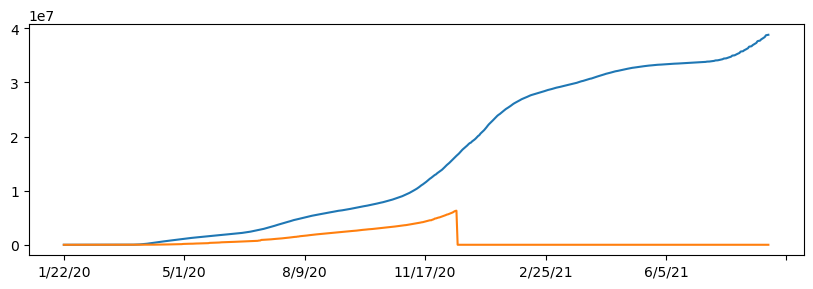

In [131]:
infected.loc['US'][2:].plot()
recovered.loc['US'][2:].plot()
plt.show()

In [132]:
infected.drop(columns=['Lat','Long'],inplace=True)
recovered.drop(columns=['Lat','Long'],inplace=True)
deaths.drop(columns=['Lat','Long'],inplace=True)

## ဒေတာကို စုံစမ်းလေ့လာခြင်း

အခုတော့ သတ်မှတ်ထားသော တစ်နိုင်ငံကို စုံစမ်းကြည့်ကြမယ်။ ရက်စွဲအလိုက် အညွှန်းထားသော ကူးစက်မှုဆိုင်ရာ ဒေတာများပါဝင်တဲ့ frame တစ်ခုကို ဖန်တီးကြရအောင်။


In [133]:
def mkframe(country):
    df = pd.DataFrame({ 'infected' : infected.loc[country] ,
                        'recovered' : recovered.loc[country],
                        'deaths' : deaths.loc[country]})
    df.index = pd.to_datetime(df.index)
    return df

df = mkframe('US')
df

infected  recovered  deaths
2020-01-22         1          0       0
2020-01-23         1          0       0
2020-01-24         2          0       0
2020-01-25         2          0       0
2020-01-26         5          0       0
...              ...        ...     ...
2021-08-25  38223029          0  632272
2021-08-26  38384360          0  633564
2021-08-27  38707294          0  636720
2021-08-28  38760363          0  637254
2021-08-29  38796746          0  637531

[586 rows x 3 columns]

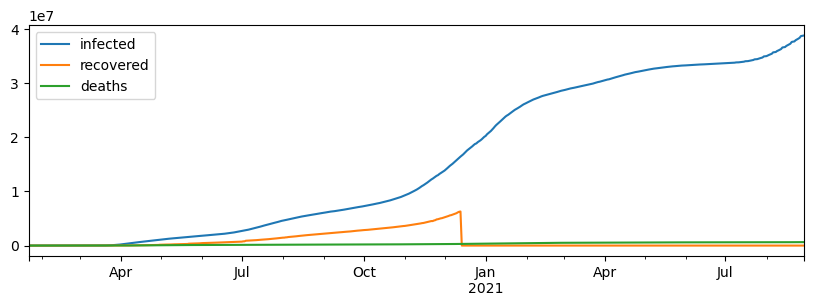

In [134]:
df.plot()
plt.show()

ယခု နေ့စဉ်အသစ်အတည်ပြုလူနာအရေအတွက်ကိုတွက်ချက်ကြည့်ရအောင်။ ဒါက ကပ်ရောဂါအရှိန်ကိုမြင်နိုင်စေမှာဖြစ်ပါတယ်။ အလွယ်ဆုံးနည်းကတော့ `diff` ကိုအသုံးပြုတာဖြစ်ပါတယ်။


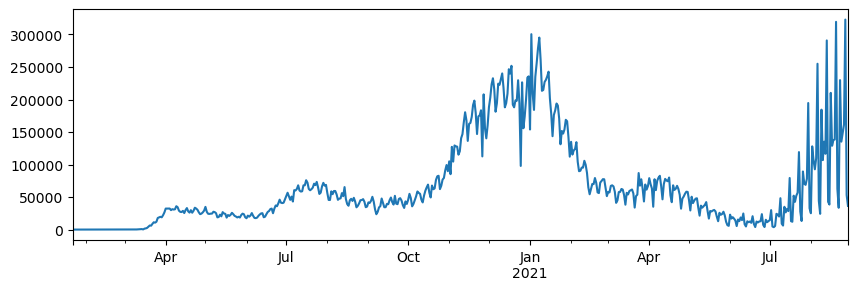

In [135]:
df['ninfected'] = df['infected'].diff()
df['ninfected'].plot()
plt.show()

ကျွန်ုပ်တို့ဒေတာတွင်အတက်အကျများမြင့်မားသည်ကိုတွေ့နိုင်ပါသည်။ လစဉ်တစ်လကိုနီးကပ်စွာကြည့်ကြရအောင်:


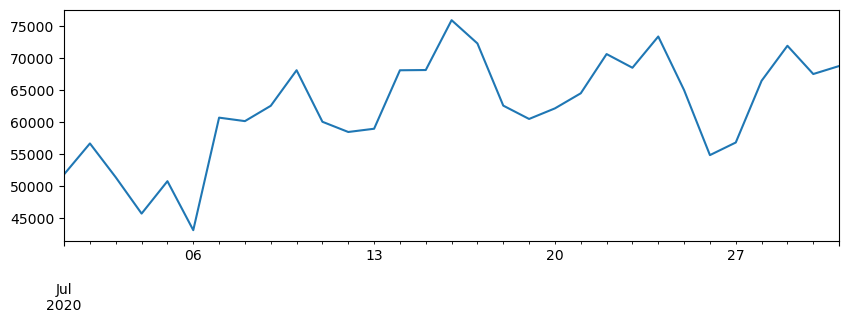

In [136]:
df[(df.index.year==2020) & (df.index.month==7)]['ninfected'].plot()
plt.show()

ဒေတာများတွင် အပတ်စဉ်အတက်အကျများ ရှိနေသည်ဟန်ပြင်းပြင်းထင်ရှားပါသည်။ ကျွန်ုပ်တို့သည် လမ်းကြောင်းများကို မြင်နိုင်လိုသောကြောင့်၊ လက်ရှိအခြေအနေကို ပိုမိုရှင်းလင်းစေရန် ရက်ပေါင်းတစ်ချို့၏ ပျမ်းမျှတန်ဖိုးကိုတွက်ချက်ခြင်းဖြင့် (ဥပမာ- တစ်ရက်စီအတွက် ယခင်ရက်အချို့၏ ပျမ်းမျှတန်ဖိုးကိုတွက်ချက်ခြင်း) အကွေးလိုင်းကိုချောမွေ့စေခြင်းသည် အဓိကကျပါသည်။


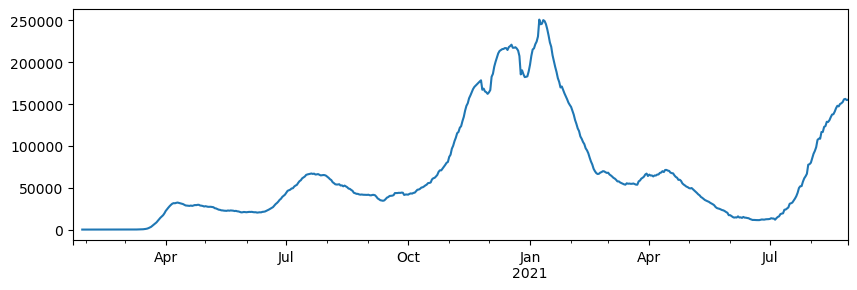

In [137]:
df['ninfav'] = df['ninfected'].rolling(window=7).mean()
df['ninfav'].plot()
plt.show()

In [138]:
countries = pd.read_csv(countries_dataset_url)
countries

UID iso2 iso3  code3     FIPS      Admin2 Province_State  \
0            4   AF  AFG    4.0      NaN         NaN            NaN   
1            8   AL  ALB    8.0      NaN         NaN            NaN   
2           12   DZ  DZA   12.0      NaN         NaN            NaN   
3           20   AD  AND   20.0      NaN         NaN            NaN   
4           24   AO  AGO   24.0      NaN         NaN            NaN   
...        ...  ...  ...    ...      ...         ...            ...   
4191  84056037   US  USA  840.0  56037.0  Sweetwater        Wyoming   
4192  84056039   US  USA  840.0  56039.0       Teton        Wyoming   
4193  84056041   US  USA  840.0  56041.0       Uinta        Wyoming   
4194  84056043   US  USA  840.0  56043.0    Washakie        Wyoming   
4195  84056045   US  USA  840.0  56045.0      Weston        Wyoming   

     Country_Region        Lat       Long_             Combined_Key  \
0       Afghanistan  33.939110   67.709953              Afghanistan   
1           Albania  41.153300   20.168300                  Albania   
2           Algeria  28.033900    1.659600                  Algeria   
3           Andorra  42.506300    1.521800                  Andorra   
4            Angola -11.202700   17.873900                   Angola   
...             ...        ...         ...                      ...   
4191             US  41.659439 -108.882788  Sweetwater, Wyoming, US   
4192             US  43.935225 -110.589080       Teton, Wyoming, US   
4193             US  41.287818 -110.547578       Uinta, Wyoming, US   
4194             US  43.904516 -107.680187    Washakie, Wyoming, US   
4195             US  43.839612 -104.567488      Weston, Wyoming, US   

      Population  
0     38928341.0  
1      2877800.0  
2     43851043.0  
3        77265.0  
4     32866268.0  
...          ...  
4191     42343.0  
4192     23464.0  
4193     20226.0  
4194      7805.0  
4195      6927.0  

[4196 rows x 12 columns]

ဒီဒေတာဆက်တင်တွင် နိုင်ငံများနှင့် ပြည်နယ်များနှစ်မျိုးလုံး၏ အချက်အလက်များပါရှိသောကြောင့်၊ တစ်နိုင်ငံလုံး၏ လူဦးရေကို ရရှိရန်အတွက် ကျွန်ုပ်တို့အနည်းငယ် ပိုမိုထက်မြက်ရမည်ဖြစ်သည်။


In [139]:
countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]

UID iso2 iso3  code3  FIPS Admin2 Province_State Country_Region   Lat  \
790  840   US  USA  840.0   NaN    NaN            NaN             US  40.0   

     Long_ Combined_Key   Population  
790 -100.0           US  329466283.0

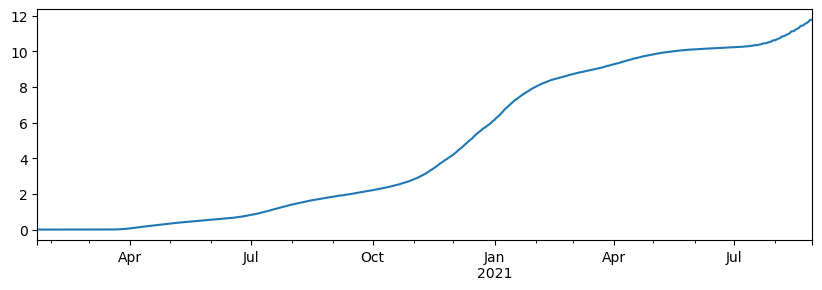

In [140]:
pop = countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]['Population'].iloc[0]
df['pinfected'] = df['infected']*100 / pop
df['pinfected'].plot(figsize=(10,3))
plt.show()

## $R_t$ ကိုတွက်ချက်ခြင်း

ရောဂါကဘယ်လောက်ကူးစက်နိုင်သလဲဆိုတာကိုကြည့်ရန် **အခြေခံပြန်လည်ကူးစက်မှုနံပါတ်** $R_0$ ကိုကြည့်ရမည်။ $R_0$ သည် ကူးစက်ခံရသူတစ်ဦးက နောက်ထပ်ဘယ်လောက်ဦးကို ကူးစက်စေမည်ကို ဖော်ပြသည်။ $R_0$ က 1 ထက်ကြီးနေပါက ရောဂါကူးစက်မှုသည် ပျံ့နှံ့နိုင်ခြေရှိသည်။

$R_0$ သည် ရောဂါ၏သဘာဝပိုင်ဆိုင်မှုတစ်ခုဖြစ်ပြီး လူများက ရောဂါကူးစက်မှုကိုနှေးကွေးစေရန် လုပ်ဆောင်မည့်ကာကွယ်ရေးအတိုင်းအတာများကို မထည့်သွင်းစဉ်းစားထားပါ။ ရောဂါကူးစက်မှုအဆင့်အတန်းတိုးတက်မှုအတွင်း $t$ အချိန်တစ်ခုချင်းစီတွင် ပြန်လည်ကူးစက်မှုနံပါတ် $R_t$ ကို ခန့်မှန်းနိုင်သည်။ ဤနံပါတ်ကို 8 ရက်အကွာအဝေးတစ်ခုကိုယူပြီး အောက်ပါနည်းဖြင့် ခန့်မှန်းတွက်ချက်နိုင်သည်ဟု ပြသထားသည်။  
$$R_t=\frac{I_{t-7}+I_{t-6}+I_{t-5}+I_{t-4}}{I_{t-3}+I_{t-2}+I_{t-1}+I_t}$$  
ဤတွင် $I_t$ သည် $t$ ရက်နေ့တွင် အသစ်ကူးစက်ခံရသူများ၏ အရေအတွက်ဖြစ်သည်။

အခုတော့ ကျွန်ုပ်တို့ရဲ့ ရောဂါကူးစက်မှုဒေတာအတွက် $R_t$ ကိုတွက်ချက်ကြမည်။ ဒါလုပ်ရန် `ninfected` အတန်း၏ 8 ရက်အကွာအဝေးကိုယူပြီး အထက်ပါနည်းဖြင့် အချိုးကိုတွက်ချက်မည်။


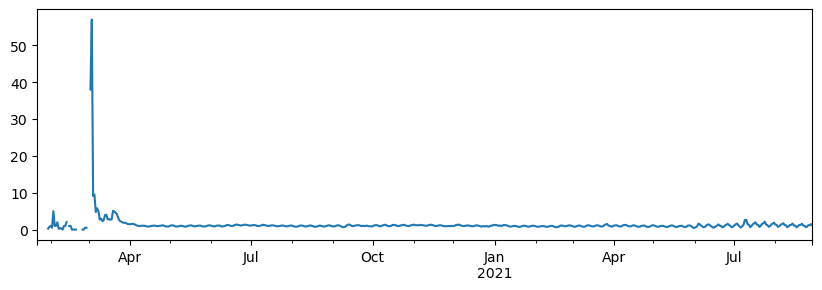

In [141]:
df['Rt'] = df['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
df['Rt'].plot()
plt.show()

အကြောင်းအရာကိုကြည့်လိုက်ရင်၊ ဂရပ်မှာအချို့နေရာတွေမှာအလွှာတွေမရှိတာတွေ့ရနိုင်ပါတယ်။ အဲဒီအလွှာမရှိတာတွေဟာ `NaN` ဒါမှမဟုတ် `inf` တန်ဖိုးတွေရှိနေတဲ့အခြေအနေကြောင့်ဖြစ်နိုင်ပါတယ်။ `inf` ဟာ 0 နဲ့စားခြင်းကြောင့်ဖြစ်နိုင်ပြီး `NaN` ကတော့ ဒေတာမရှိခြင်း၊ ဒါမှမဟုတ် ရလဒ်ကိုတွက်ချက်ဖို့အတွက်လိုအပ်တဲ့ဒေတာမရှိခြင်းကိုပြသနိုင်ပါတယ် (ဥပမာ- frame ရဲ့အစပိုင်းမှာ 8 အကျယ်ရှိတဲ့ rolling window မရရှိသေးတဲ့အခြေအနေလိုမျိုး)။ ဂရပ်ကိုပိုမိုလှပအောင်လုပ်ဖို့အတွက် `replace` နဲ့ `fillna` function တွေကိုသုံးပြီး အဲဒီတန်ဖိုးတွေကိုဖြည့်စွက်ဖို့လိုပါတယ်။

အခုတော့ ကပ်ရောဂါအစပိုင်းကိုနောက်ထပ်ကြည့်လိုက်ရအောင်။ y-axis တန်ဖိုးတွေကို 6 အောက်တန်ဖိုးတွေကိုသာပြသအောင် ကန့်သတ်ပြီး ပိုမိုရှင်းလင်းစေရန် 1 တန်ဖိုးမှာ အလျားလိုင်းတစ်ခုဆွဲပါမယ်။


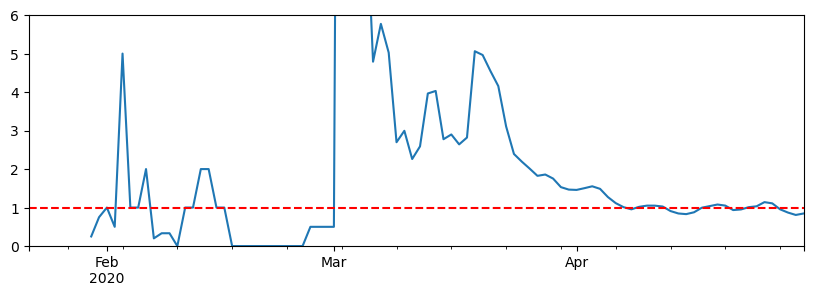

In [142]:
ax = df[df.index<"2020-05-01"]['Rt'].replace(np.inf,np.nan).fillna(method='pad').plot(figsize=(10,3))
ax.set_ylim([0,6])
ax.axhline(1,linestyle='--',color='red')
plt.show()

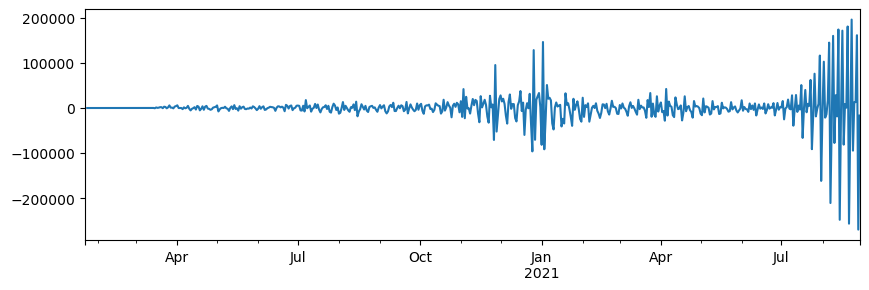

In [143]:
df['ninfected'].diff().plot()
plt.show()

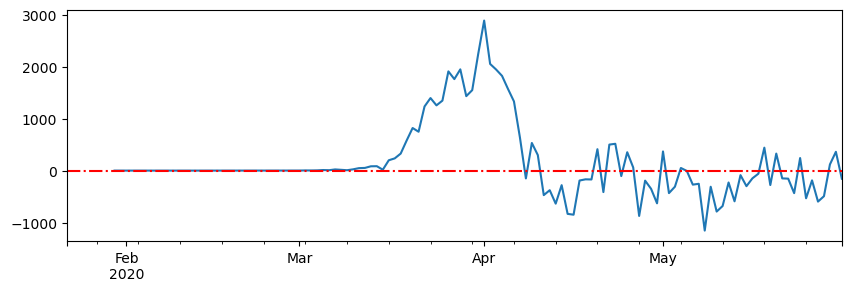

In [150]:
ax=df[df.index<"2020-06-01"]['ninfected'].diff().rolling(7).mean().plot()
ax.axhline(0,linestyle='-.',color='red')
plt.show()

## စိန်ခေါ်မှု

အခုတော့ သင့်အနေနဲ့ ကုဒ်နဲ့ ဒေတာတွေကို ပိုပြီး လေ့လာဖို့ အချိန်ရောက်ပါပြီ! အောက်မှာ သင် စမ်းသပ်နိုင်မယ့် အကြံတစ်ချို့ကို ဖော်ပြထားပါတယ်။
* ကမ္ဘာ့အမျိုးမျိုးနိုင်ငံတွေမှာ ကပ်ရောဂါ ပြန့်ပွားမှုကို ကြည့်ရှုပါ။
* နိုင်ငံအများအပြားအတွက် $R_t$ ဂရပ်တွေကို တစ်ခုပေါ်တည်း ရှု့မှတ်ဖို့ သို့မဟုတ် ဘေးချင်းယှဉ်ကြည့်ဖို့ အတူတူ ရှု့မှတ်ပါ။
* သေဆုံးမှုနဲ့ ပြန်လည်ကောင်းမွန်မှု အရေအတွက်တွေဟာ ကူးစက်ခံရသူ အရေအတွက်နဲ့ ဘယ်လို ဆက်စပ်နေသလဲဆိုတာ ကြည့်ရှုပါ။
* ရောဂါတစ်ခုရဲ့ ပျမ်းမျှ ကြာချိန်ကို သိရန် ကူးစက်နှုန်းနဲ့ သေဆုံးနှုန်းကို မြင်သာစေဖို့ ကြိုးစားပြီး အထူးအဆန်းတွေကို ရှာဖွေကြည့်ပါ။ ဒါကို သိရန် နိုင်ငံအမျိုးမျိုးကို ကြည့်ဖို့ လိုတတ်ပါတယ်။
* သေဆုံးနှုန်းကို တွက်ချက်ပြီး အချိန်အလိုက် ဘယ်လို ပြောင်းလဲသလဲဆိုတာ ကြည့်ပါ။ ရောဂါကြာချိန်ကို ရက်ပေါင်းအလိုက် ထည့်သွင်းစဉ်းစားပြီး တစ်ခုချင်းစီကို အချိန်လိုက် ရှေ့ဆွဲပြီးမှ တွက်ချက်ဖို့လိုတတ်ပါတယ်။


## ကိုးကားချက်များ

COVID ကပ်ရောဂါပျံ့နှံ့မှုကို လေ့လာရန် အောက်ပါစာတမ်းများကို ကြည့်ရှုနိုင်ပါသည်။
* [Sliding SIR Model for Rt Estimation during COVID Pandemic](https://soshnikov.com/science/sliding-sir-model-for-rt-estimation/), [Dmitry Soshnikov](http://soshnikov.com) ၏ ဘလော့ဂ်ပို့စ်
* T.Petrova, D.Soshnikov, A.Grunin. [Estimation of Time-Dependent Reproduction Number for Global COVID-19 Outbreak](https://www.preprints.org/manuscript/202006.0289/v1). *Preprints* **2020**, 2020060289 (doi: 10.20944/preprints202006.0289.v1)
* [GitHub တွင် အထက်ပါစာတမ်းအတွက် ကုဒ်](https://github.com/shwars/SlidingSIR)



---

**ဝက်ဘ်ဆိုက်မှတ်ချက်**:  
ဤစာရွက်စာတမ်းကို AI ဘာသာပြန်ဝန်ဆောင်မှု [Co-op Translator](https://github.com/Azure/co-op-translator) ကို အသုံးပြု၍ ဘာသာပြန်ထားပါသည်။ ကျွန်ုပ်တို့သည် တိကျမှန်ကန်မှုအတွက် ကြိုးစားနေပါသော်လည်း၊ အလိုအလျောက်ဘာသာပြန်ဆိုမှုများတွင် အမှားများ သို့မဟုတ် မတိကျမှုများ ပါဝင်နိုင်သည်ကို ကျေးဇူးပြု၍ သတိပြုပါ။ မူရင်းစာရွက်စာတမ်းကို ၎င်း၏ မူလဘာသာစကားဖြင့် အာဏာတည်သောရင်းမြစ်အဖြစ် သတ်မှတ်ရန် လိုအပ်ပါသည်။ အရေးကြီးသော အချက်အလက်များအတွက် လူ့ဘာသာပြန်ပညာရှင်များမှ ပြန်ဆိုမှုကို အကြံပြုပါသည်။ ဤဘာသာပြန်ကို အသုံးပြုခြင်းမှ ဖြစ်ပေါ်လာသော နားလည်မှုမှားများ သို့မဟုတ် အဓိပ္ပာယ်မှားများအတွက် ကျွန်ုပ်တို့သည် တာဝန်မယူပါ။
